In [1]:
! pip install keras

    100% |████████████████████████████████| 378kB 24.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<h2>Load Data</h2>

In [6]:
from script import load as download

In [8]:
X_train, X_val, Y_train, Y_val = [download('engineered_data/experiment-1/' + i + '.pkl') for i in ('X_train', 'X_val', 'Y_train', 'Y_val')]

<h2>Train Models</h2>

In [4]:
#Dependencies
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [137]:
models_1st_layer = {}

In [139]:
# Neural network
models_1st_layer['model-1'] = Sequential()
models_1st_layer['model-1'].add(Dense(110, activation='relu'))
models_1st_layer['model-1'].add(Dropout(0.2))
models_1st_layer['model-1'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-1'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-2'] = Sequential()
models_1st_layer['model-2'].add(Dense(110, activation='relu'))
models_1st_layer['model-2'].add(Dropout(0.2))
models_1st_layer['model-2'].add(Dense(110, activation='relu'))
models_1st_layer['model-2'].add(Dropout(0.2))
models_1st_layer['model-2'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-2'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-3'] = Sequential()
models_1st_layer['model-3'].add(Dense(110, activation='softmax'))
models_1st_layer['model-3'].add(Dropout(0.2))
models_1st_layer['model-3'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-3'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-4'] = Sequential()
models_1st_layer['model-4'].add(Dense(110, activation='relu'))
models_1st_layer['model-4'].add(Dropout(0.2))
models_1st_layer['model-4'].add(Dense(110, activation='relu'))
models_1st_layer['model-4'].add(Dropout(0.2))
models_1st_layer['model-4'].add(Dense(110, activation='relu'))
models_1st_layer['model-4'].add(Dropout(0.2))
models_1st_layer['model-4'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-4'].compile(loss='mse', optimizer='sgd', metrics = ['accuracy'])

models_1st_layer['model-5'] = Sequential()
models_1st_layer['model-5'].add(Dense(110, activation='relu'))
models_1st_layer['model-5'].add(Dropout(0.2))
models_1st_layer['model-5'].add(Dense(110, activation='relu'))
models_1st_layer['model-5'].add(Dropout(0.2))
models_1st_layer['model-5'].add(Dense(110, activation='relu'))
models_1st_layer['model-5'].add(Dropout(0.2))
models_1st_layer['model-5'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-5'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-6'] = Sequential()
models_1st_layer['model-6'].add(Dense(550, activation='relu'))
models_1st_layer['model-6'].add(Dropout(0.2))
models_1st_layer['model-6'].add(Dense(550, activation='relu'))
models_1st_layer['model-6'].add(Dropout(0.2))
models_1st_layer['model-6'].add(Dense(110, activation='relu'))
models_1st_layer['model-6'].add(Dropout(0.2))
models_1st_layer['model-6'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-6'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-7'] = Sequential()
models_1st_layer['model-7'].add(Dense(110, activation='relu'))
models_1st_layer['model-7'].add(Dropout(0.2))
models_1st_layer['model-7'].add(Dense(110, activation='softmax'))
models_1st_layer['model-7'].add(Dropout(0.2))
models_1st_layer['model-7'].add(Dense(110, activation='relu'))
models_1st_layer['model-7'].add(Dropout(0.2))
models_1st_layer['model-7'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-7'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-8'] = Sequential()
models_1st_layer['model-8'].add(Dense(1100, activation='relu'))
models_1st_layer['model-8'].add(Dropout(0.2))
models_1st_layer['model-8'].add(Dense(110, activation='relu'))
models_1st_layer['model-8'].add(Dropout(0.2))
models_1st_layer['model-8'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-8'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
                                    
models_1st_layer['model-9'] = Sequential()
models_1st_layer['model-9'].add(Dense(110, activation='relu'))
models_1st_layer['model-9'].add(Dropout(0.2))
models_1st_layer['model-9'].add(Dense(1100, activation='relu'))
models_1st_layer['model-9'].add(Dropout(0.2))
models_1st_layer['model-9'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-9'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-10'] = Sequential()
models_1st_layer['model-10'].add(Dense(110, activation='relu'))
models_1st_layer['model-10'].add(Dropout(0.2))
models_1st_layer['model-10'].add(Dense(55, activation='relu'))
models_1st_layer['model-10'].add(Dropout(0.2))
models_1st_layer['model-10'].add(Dense(55, activation='relu'))
models_1st_layer['model-10'].add(Dropout(0.2))
models_1st_layer['model-10'].add(Dense(55, activation='relu'))
models_1st_layer['model-10'].add(Dropout(0.2))
models_1st_layer['model-10'].add(Dense(55, activation='relu'))
models_1st_layer['model-10'].add(Dropout(0.2))
models_1st_layer['model-10'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-10'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
                 
models_1st_layer['model-11'] = Sequential()
models_1st_layer['model-11'].add(Dense(110, activation='relu'))
models_1st_layer['model-11'].add(Dropout(0.2))
models_1st_layer['model-11'].add(Dense(55, activation='relu'))
models_1st_layer['model-11'].add(Dropout(0.2))
models_1st_layer['model-11'].add(Dense(55, activation='relu'))
models_1st_layer['model-11'].add(Dropout(0.2))
models_1st_layer['model-11'].add(Dense(55, activation='relu'))
models_1st_layer['model-11'].add(Dropout(0.2))
models_1st_layer['model-11'].add(Dense(55, activation='relu'))
models_1st_layer['model-11'].add(Dropout(0.2))
models_1st_layer['model-11'].add(Dense(80, activation = 'sigmoid'))
models_1st_layer['model-11'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-12'] = Sequential()
models_1st_layer['model-12'].add(Dense(110, activation='relu'))
models_1st_layer['model-12'].add(Dropout(0.2))
models_1st_layer['model-12'].add(Dense(55, activation='relu'))
models_1st_layer['model-12'].add(Dropout(0.2))
models_1st_layer['model-12'].add(Dense(55, activation='softmax'))
models_1st_layer['model-12'].add(Dropout(0.2))
models_1st_layer['model-12'].add(Dense(55, activation='relu'))
models_1st_layer['model-12'].add(Dropout(0.2))
models_1st_layer['model-12'].add(Dense(55, activation='relu'))
models_1st_layer['model-12'].add(Dropout(0.2))
models_1st_layer['model-12'].add(Dense(80, activation = 'sigmoid'))
models_1st_layer['model-12'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-13'] = Sequential()
models_1st_layer['model-13'].add(Dense(110, activation='relu'))
models_1st_layer['model-13'].add(Dropout(0.2))
models_1st_layer['model-13'].add(Dense(55, activation='relu'))
models_1st_layer['model-13'].add(Dropout(0.2))
models_1st_layer['model-13'].add(Dense(55, activation='sigmoid'))
models_1st_layer['model-13'].add(Dropout(0.2))
models_1st_layer['model-13'].add(Dense(55, activation='relu'))
models_1st_layer['model-13'].add(Dropout(0.2))
models_1st_layer['model-13'].add(Dense(55, activation='relu'))
models_1st_layer['model-13'].add(Dropout(0.2))
models_1st_layer['model-13'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-13'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-14'] = Sequential()
models_1st_layer['model-14'].add(Dense(110, activation='sigmoid'))
models_1st_layer['model-14'].add(Dropout(0.2))
models_1st_layer['model-14'].add(Dense(110, activation='sigmoid'))
models_1st_layer['model-14'].add(Dropout(0.2))
models_1st_layer['model-14'].add(Dense(110, activation='softmax'))
models_1st_layer['model-14'].add(Dropout(0.2))
models_1st_layer['model-14'].add(Dense(80, activation = 'sigmoid'))
models_1st_layer['model-14'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-15'] = Sequential()
models_1st_layer['model-15'].add(Dense(110, activation='relu'))
models_1st_layer['model-15'].add(Dropout(0.2))
models_1st_layer['model-15'].add(Dense(110, activation='sigmoid'))
models_1st_layer['model-15'].add(Dropout(0.2))
models_1st_layer['model-15'].add(Dense(110, activation='sigmoid'))
models_1st_layer['model-15'].add(Dropout(0.2))
models_1st_layer['model-15'].add(Dense(80, activation = 'softmax'))
models_1st_layer['model-15'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-16'] = Sequential()
models_1st_layer['model-16'].add(Dense(110, activation='relu'))
models_1st_layer['model-16'].add(Dropout(0.2))
models_1st_layer['model-16'].add(Dense(110, activation='relu'))
models_1st_layer['model-16'].add(Dropout(0.2))
models_1st_layer['model-16'].add(Dense(110, activation='softmax'))
models_1st_layer['model-16'].add(Dropout(0.2))
models_1st_layer['model-16'].add(Dense(80, activation = 'linear'))
models_1st_layer['model-16'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-17'] = Sequential()
models_1st_layer['model-17'].add(Dense(110, activation='relu'))
models_1st_layer['model-17'].add(Dropout(0.2))
models_1st_layer['model-17'].add(Dense(220, activation='relu'))
models_1st_layer['model-17'].add(Dropout(0.2))
models_1st_layer['model-17'].add(Dense(80, activation = 'linear'))
models_1st_layer['model-17'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

models_1st_layer['model-18'] = Sequential()
models_1st_layer['model-18'].add(Dense(110, activation='relu'))
models_1st_layer['model-18'].add(Dropout(0.1))
models_1st_layer['model-18'].add(Dense(220, activation='relu'))
models_1st_layer['model-18'].add(Dropout(0.1))
models_1st_layer['model-18'].add(Dense(80, activation = 'linear'))
models_1st_layer['model-18'].compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

In [ ]:
for model_name, model in models_1st_layer.items():
    print('training ' + model_name)
    model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=32)

training model-1
Train on 57527 samples, validate on 14382 samples
Epoch 1/100
57527/57527 [==============================] - 4s 62us/step - loss: 0.1443 - accuracy: 0.1668 - val_loss: 0.1429 - val_accuracy: 0.1793
Epoch 2/100
57527/57527 [==============================] - 3s 47us/step - loss: 0.1432 - accuracy: 0.1588 - val_loss: 0.1427 - val_accuracy: 0.1740
Epoch 3/100
57527/57527 [==============================] - 3s 46us/step - loss: 0.1430 - accuracy: 0.1588 - val_loss: 0.1425 - val_accuracy: 0.1959
Epoch 4/100
57527/57527 [==============================] - 3s 46us/step - loss: 0.1429 - accuracy: 0.1664 - val_loss: 0.1425 - val_accuracy: 0.1784
Epoch 5/100
57527/57527 [==============================] - 3s 46us/step - loss: 0.1429 - accuracy: 0.1731 - val_loss: 0.1424 - val_accuracy: 0.1848
Epoch 6/100
57527/57527 [==============================] - 3s 46us/step - loss: 0.1429 - accuracy: 0.1750 - val_loss: 0.1424 - val_accuracy: 0.2012
Epoch 7/100
57527/57527 [====================

In [134]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=80, batch_size=32)

Train on 57527 samples, validate on 14382 samples
Epoch 1/80
57527/57527 [==============================] - 3s 59us/step - loss: 0.1444 - accuracy: 0.1692 - val_loss: 0.1430 - val_accuracy: 0.1813
Epoch 2/80
57527/57527 [==============================] - 3s 45us/step - loss: 0.1433 - accuracy: 0.1602 - val_loss: 0.1427 - val_accuracy: 0.1506
Epoch 3/80
57527/57527 [==============================] - 3s 45us/step - loss: 0.1430 - accuracy: 0.1629 - val_loss: 0.1425 - val_accuracy: 0.1887
Epoch 4/80
57527/57527 [==============================] - 3s 44us/step - loss: 0.1429 - accuracy: 0.1693 - val_loss: 0.1425 - val_accuracy: 0.1486
Epoch 5/80
57527/57527 [==============================] - 3s 45us/step - loss: 0.1429 - accuracy: 0.1741 - val_loss: 0.1424 - val_accuracy: 0.1626
Epoch 6/80
57527/57527 [==============================] - 3s 45us/step - loss: 0.1428 - accuracy: 0.1755 - val_loss: 0.1424 - val_accuracy: 0.1896
Epoch 7/80
57527/57527 [==============================] - 3s 45us/st

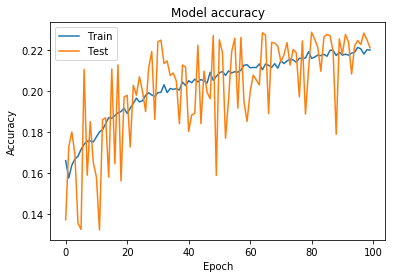

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

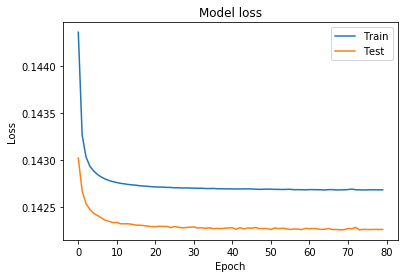

In [135]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

<h2>Save Model</h2>

In [109]:
import boto3

# Convert your existing model to JSON
saved_model = model.to_json()

# Write JSON object to S3 as "keras-model.json"
client = boto3.client('s3')

In [110]:
client.put_object(Body=saved_model,
                  Bucket='bme-bucket',
                  Key='models/keras-model-8.json')

{'ResponseMetadata': {'RequestId': 'BFE2AC49A7F2C1AE',
  'HostId': 'htVLb3Ts8AwrM5iGZ+G8akpn586sjnGX8IOomy0pIJdqls8HO334uJC/qAAWbVsQvdTDJd04TbE=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'htVLb3Ts8AwrM5iGZ+G8akpn586sjnGX8IOomy0pIJdqls8HO334uJC/qAAWbVsQvdTDJd04TbE=',
   'x-amz-request-id': 'BFE2AC49A7F2C1AE',
   'date': 'Sun, 29 Dec 2019 01:43:23 GMT',
   'etag': '"5ea0fa74db07e5b96396412f5cb64961"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"5ea0fa74db07e5b96396412f5cb64961"'}

<h3>method 2</h3>

In [ ]:
import boto3
import io
import pickle

s3_client = boto3.client('s3')

In [ ]:
my_array_data = io.BytesIO()
pickle.dump(FITTED_ESTIMATORS, my_array_data)
my_array_data.seek(0)
s3_client.upload_fileobj(my_array_data, 'bme-bucket', 'models/experiment-0/2nd-layer-models/models_dict.pkl')